# Loan Prediction
 
## Loan Prediction Using Logistic Regression

### Importing Libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### Loading the Dataset

In [92]:
df= pd.read_csv("train.csv")

In [93]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [94]:
df.shape

(614, 13)

In [95]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Data Cleaning

In [96]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [97]:
df['LoanAmount']= df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [98]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [99]:
df['Loan_Amount_Term']= df['Loan_Amount_Term'].fillna(fd['Loan_Amount_Term'].mean())

NameError: name 'fd' is not defined

In [100]:
df.dropna(inplace=True)

In [101]:
df.shape

(499, 13)

## Exploratory Data Analysis

In [102]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

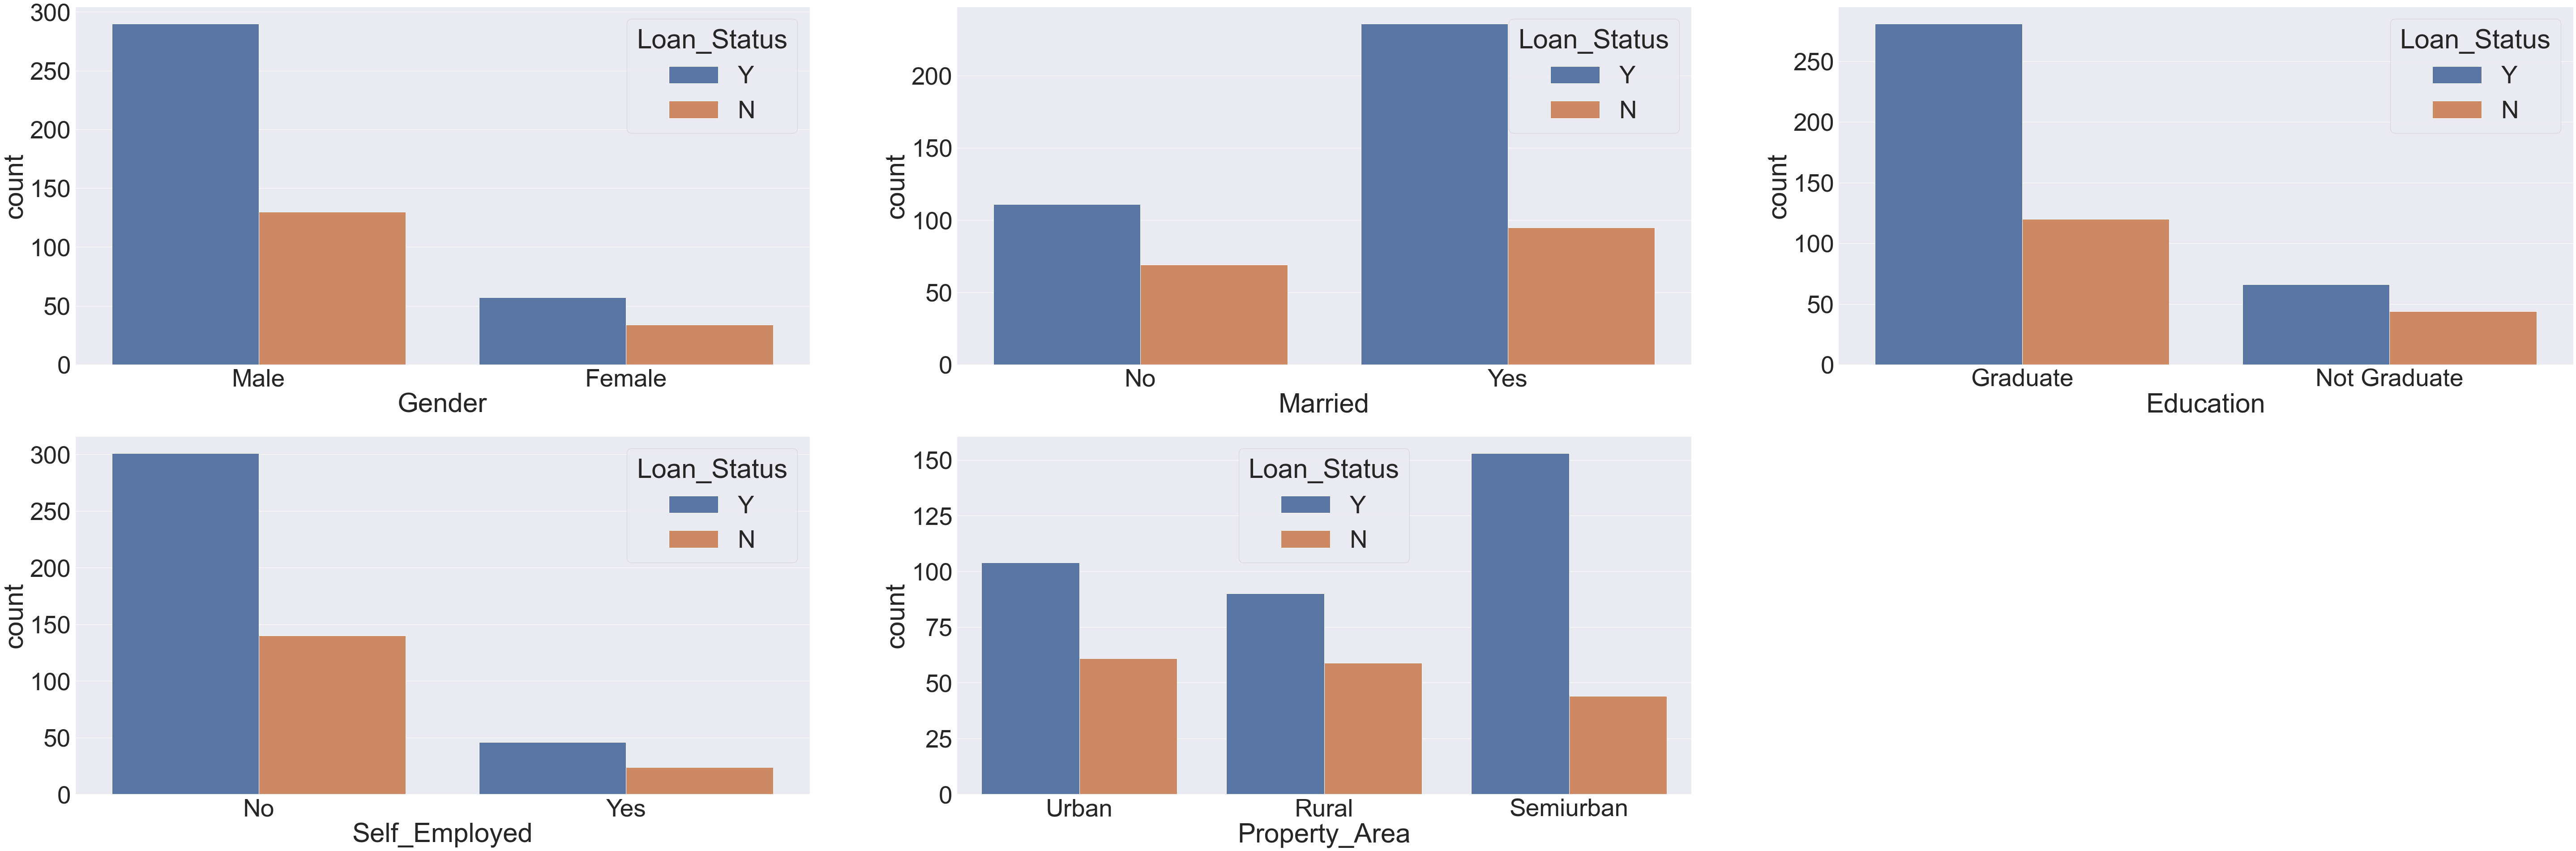

In [103]:
plt.figure(figsize= (100, 50))
sns.set(font_scale= 5)
plt.subplot(331)
sns.countplot(data['Gender'], hue= data['Loan_Status'])

plt.subplot(332)
sns.countplot(data['Married'], hue= data['Loan_Status'])

plt.subplot(333)
sns.countplot(data['Education'], hue= data['Loan_Status'])

plt.subplot(334)
sns.countplot(data['Self_Employed'], hue= data['Loan_Status'])

plt.subplot(335)
sns.countplot(data['Property_Area'], hue= data['Loan_Status'])


In [104]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


### Handling Categorical Values

In [105]:
categorical_col= ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']

In [106]:
for item in categorical_col:
    temp_df= pd.get_dummies(df[item],prefix= item, drop_first= True)
    df= pd.concat([temp_df, df], axis=1)

In [107]:
df.head()

,Dependents_1,Dependents_2,Dependents_3+,Loan_Status_Y,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes,Education_Not Graduate,Married_Yes,Gender_Male,...,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,1,0,0,0,1,...,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,0,0,0,0,0,0,0,1,1,...,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,0,0,0,1,0,1,1,0,1,1,...,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,0,0,0,1,0,1,0,1,1,1,...,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,0,0,0,1,0,1,0,0,0,1,...,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [108]:
df.shape

(499, 23)

In [109]:
for item in categorical_col:
    df.drop(item, axis=1, inplace= True)

In [110]:
df.head()

,Dependents_1,Dependents_2,Dependents_3+,Loan_Status_Y,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes,Education_Not Graduate,Married_Yes,Gender_Male,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,0,0,1,0,1,0,0,0,1,LP001002,5849,0.0,146.412162,360.0,1.0
1,1,0,0,0,0,0,0,0,1,1,LP001003,4583,1508.0,128.000000,360.0,1.0
2,0,0,0,1,0,1,1,0,1,1,LP001005,3000,0.0,66.000000,360.0,1.0
3,0,0,0,1,0,1,0,1,1,1,LP001006,2583,2358.0,120.000000,360.0,1.0
4,0,0,0,1,0,1,0,0,0,1,LP001008,6000,0.0,141.000000,360.0,1.0


In [111]:
df.drop('Loan_ID', axis=1, inplace= True)

### Final Dataframe

In [112]:
df.head()

,Dependents_1,Dependents_2,Dependents_3+,Loan_Status_Y,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes,Education_Not Graduate,Married_Yes,Gender_Male,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,0,0,1,0,1,0,0,0,1,5849,0.0,146.412162,360.0,1.0
1,1,0,0,0,0,0,0,0,1,1,4583,1508.0,128.000000,360.0,1.0
2,0,0,0,1,0,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0
3,0,0,0,1,0,1,0,1,1,1,2583,2358.0,120.000000,360.0,1.0
4,0,0,0,1,0,1,0,0,0,1,6000,0.0,141.000000,360.0,1.0


### Slicing X and y

In [113]:
X= df.iloc[:,1:]

In [114]:
X.head()

,Dependents_2,Dependents_3+,Loan_Status_Y,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes,Education_Not Graduate,Married_Yes,Gender_Male,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,0,1,0,1,0,0,0,1,5849,0.0,146.412162,360.0,1.0
1,0,0,0,0,0,0,0,1,1,4583,1508.0,128.000000,360.0,1.0
2,0,0,1,0,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0
3,0,0,1,0,1,0,1,1,1,2583,2358.0,120.000000,360.0,1.0
4,0,0,1,0,1,0,0,0,1,6000,0.0,141.000000,360.0,1.0


In [115]:
y= df.iloc[:,[0]]
y.head()

,Dependents_1
0,0
1,1
2,0
3,0
4,0


### Imporing packages for Classification algorithm


In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


### Splitting into train test set

In [135]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 42)

In [136]:
X_train

,Dependents_2,Dependents_3+,Loan_Status_Y,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes,Education_Not Graduate,Married_Yes,Gender_Male,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
567,0,1,0,0,0,0,0,1,1,3400,2500.000000,123.000000,360.0,0.0
438,0,0,0,0,1,1,0,0,1,10416,0.000000,187.000000,360.0,0.0
3,0,0,1,0,1,0,1,1,1,2583,2358.000000,120.000000,360.0,1.0
493,0,0,1,1,0,1,1,0,0,17263,0.000000,225.000000,360.0,1.0
470,0,0,1,1,0,1,0,1,1,3450,2079.000000,162.000000,360.0,1.0
71,1,0,1,1,0,1,1,1,1,1875,1875.000000,97.000000,360.0,1.0
138,0,0,0,1,0,0,0,0,1,14999,0.000000,242.000000,360.0,0.0
393,1,0,1,1,0,0,1,1,1,1993,1625.000000,113.000000,180.0,1.0
321,0,1,1,1,0,0,0,1,1,4342,189.000000,124.000000,360.0,1.0
37,0,0,1,1,0,0,0,1,0,3667,1459.000000,144.000000,360.0,1.0


In [137]:
y_train

,Dependents_1
567,0
438,0
3,0
493,0
470,1
71,0
138,0
393,0
321,0
37,0


In [138]:
pd.set_option('display.max_rows', 500)

In [139]:
X_train

,Dependents_2,Dependents_3+,Loan_Status_Y,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes,Education_Not Graduate,Married_Yes,Gender_Male,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
567,0,1,0,0,0,0,0,1,1,3400,2500.000000,123.000000,360.0,0.0
438,0,0,0,0,1,1,0,0,1,10416,0.000000,187.000000,360.0,0.0
3,0,0,1,0,1,0,1,1,1,2583,2358.000000,120.000000,360.0,1.0
493,0,0,1,1,0,1,1,0,0,17263,0.000000,225.000000,360.0,1.0
470,0,0,1,1,0,1,0,1,1,3450,2079.000000,162.000000,360.0,1.0
71,1,0,1,1,0,1,1,1,1,1875,1875.000000,97.000000,360.0,1.0
138,0,0,0,1,0,0,0,0,1,14999,0.000000,242.000000,360.0,0.0
393,1,0,1,1,0,0,1,1,1,1993,1625.000000,113.000000,180.0,1.0
321,0,1,1,1,0,0,0,1,1,4342,189.000000,124.000000,360.0,1.0
37,0,0,1,1,0,0,0,1,0,3667,1459.000000,144.000000,360.0,1.0


### Logistic Regression

In [140]:
lr= LogisticRegression()
lr.fit(X_train, y_train)
lr_prediction= lr.predict(X_test)
print("Logistic Regression accuracy : ", metrics.accuracy_score(lr_prediction, y_test))
    

Logistic Regression accuracy :  0.8533333333333334
